# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Juli You*
Netid:  *jy243*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

**a) Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the blobs dataset from scikit-learn with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class K_means():
    def __init__(self, kcluster = 2, max_iter = 500, tol=1e-6):
        self.kcluster = kcluster
        self.max_iter = max_iter
        self.tol = tol

    def get_labels(self, X):
        label = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            dist = np.linalg.norm(self.centroid - x, axis = 1)
            label[i] = np.argmin(dist)
        return label
    
    def get_centroids(self, X):
        centroids = np.zeros_like(self.centroid)
        for i in range(centroids.shape[0]):
            centroids[i] = np.mean(X[np.where(self.label == i)], axis = 0)
        return centroids
    
    def fit(self, X):
        row_num = X.shape[0]
        self.centroid = X[np.random.choice(row_num, self.kcluster, replace = False)]
        self.label = np.zeros(X.shape[0]) - 1
        diff = np.infty
        i = 0
        while i < self.max_iter:
            while self.tol < diff:
                self.label = self.get_labels(X)
                new_centroid = self.get_centroids(X)
                diff = np.max(np.linalg.norm(new_centroid - self.centroid, axis = 1))
                self.centroid = new_centroid
            i += 1
        return self
    
    def get_SSE(self, X):
        SSE_list = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            SSE_list[i] = np.linalg.norm(x - self.centroid[self.label[i].astype(int)])
        return np.sum(SSE_list ** 2)

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X1, y1 = make_blobs(n_samples = 500, n_features = 2, centers = 2, random_state = 0)
X2, y2 = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 0)

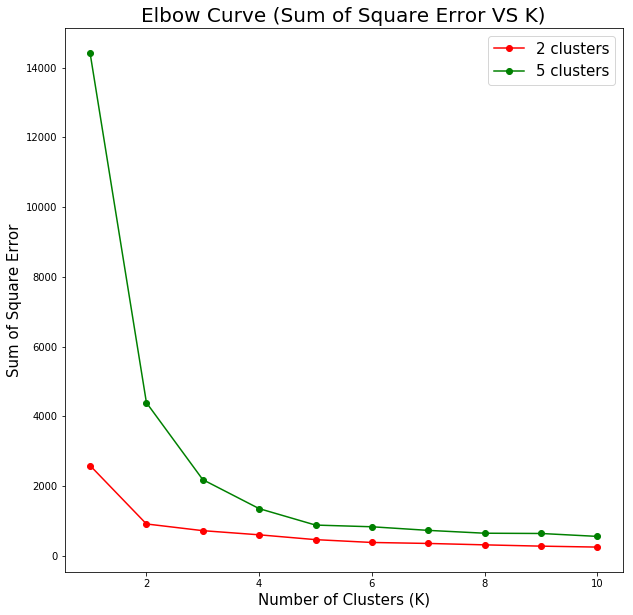

In [14]:
SSE_2 = []
SSE_5 = []
for k in range(1, 11):
    kmean_2 = K_means(kcluster = k).fit(X1)
    SSE_2.append(kmean_2.get_SSE(X1))
    kmean_5 = K_means(kcluster = k).fit(X2)
    SSE_5.append(kmean_5.get_SSE(X2))

plt.figure(figsize = (10, 10))
plt.plot(np.arange(1, 11), SSE_2, '-o', c = 'red', label = '2 clusters')
plt.plot(np.arange(1, 11), SSE_5, '-o', c = 'green', label = '5 clusters')
plt.legend(fontsize = 15)
plt.title('Elbow Curve (Sum of Square Error VS K)', fontsize = 20)
plt.xlabel('Number of Clusters (K)', fontsize = 15)
plt.ylabel('Sum of Square Error', fontsize = 15)
plt.show()

The elbow of the curve for 2-clustered blobs is at k = 2, because the graph shows that the marginal decrease in SSE when k changes from 2 to 3 diminishes dramatically compared to that when k changes from 1 to 2.

The elbow of the curve for 5-clustered blobs is at k = 5. Fromt the graph above, we can see the slope becomes very small when k reaches to 5. Any further increase of k will not siginicantly decrease SSE.

In general, SSE decreases when k increases, but we should not simply puruse as low SSE as possible, because we will overfit the data. It's important to select an appropriate k value by analyzing the elbow curve.

**(b) Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering**

(1) **K-means** is a centriod-based clustering algorithm which takes k (number of clusters) as hyperparameter, randomly initializes centriods, clusters data points to nearest centriods, and updates the mean to be new centriods. This process repeats until the covergence. It performs well with clusters of equal variance, but struggles when the clusters have nonlinear boundaries. 

(2) **Agglomerative clustering** is a hierarchical clustering algorithm which starts with one cluster for each data point and creates nested clusters by merging them step by step until the desired number of clusters is reached. It does well when clusters are well-separated but struggles when intercluster distance is insufficient to distinguish clusters.

(3) **Gaussian mixture models** is a distribution-based clustering algorithm that assumes all the data points are generated from a mixture of a finite number of gaussian distributions with unknown parameters. It maximizes the log likelihood given the model parameters. It performs well with variation in cluster variance, correlation between features, and clusters of equal variance, but struggles when clusters are not approximately Gaussian.

(4) **DBSCAN** is a density-based clustering algorithm that labels core and border points based on given specified radius and minPts, groups neighboring core points, and adds border points which are neighbors of core points. It doesn't require pre-defined clusters.

(5) **Spectral Clustering** is a graph-based clustering algorithm which creates an affinity matrix. After using PCA to reduce the dimension, it applies clustering algorithm to perform final clustering. 

**(c) For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?**

In [411]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [412]:
Aggregation = np.loadtxt('./Aggregation.txt')
Compound = np.loadtxt('./Compound.txt')
jain = np.loadtxt('./jain.txt')
D31 = np.loadtxt('./D31.txt')

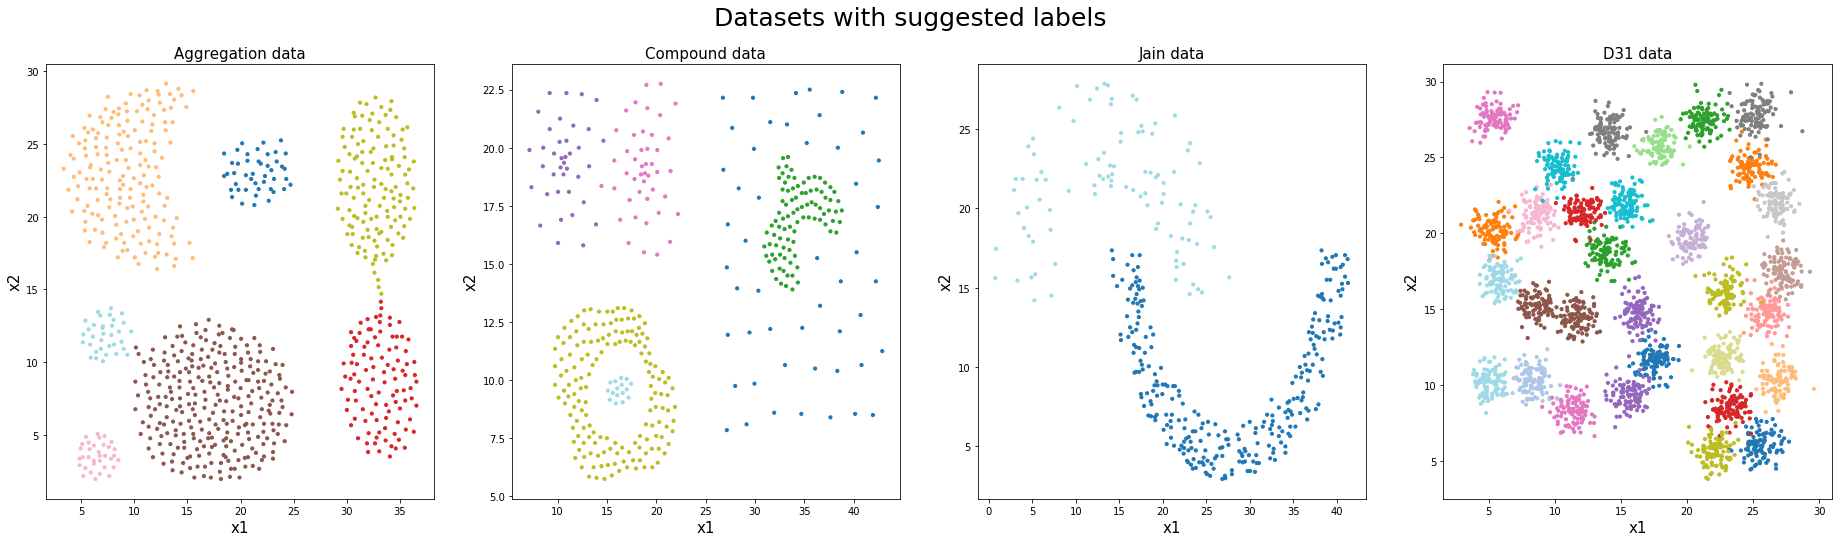

In [502]:
dataset = [Aggregation, Compound, jain, D31]
name = ['Aggregation data', 'Compound data', 'Jain data', 'D31 data']
i = 0
plt.figure(figsize = (32, 8))
for data in dataset:
    plt.subplot(1, 4, i+1)
    plt.scatter(data[:, 0], data[:, 1], c = data[:, 2], cmap = 'tab20', s = 10)
    plt.xlabel('x1', fontsize = 15)
    plt.ylabel('x2', fontsize = 15)
    plt.title(name[i], fontsize = 15)
    i += 1
plt.suptitle('Datasets with suggested labels', fontsize = 25)
plt.show()

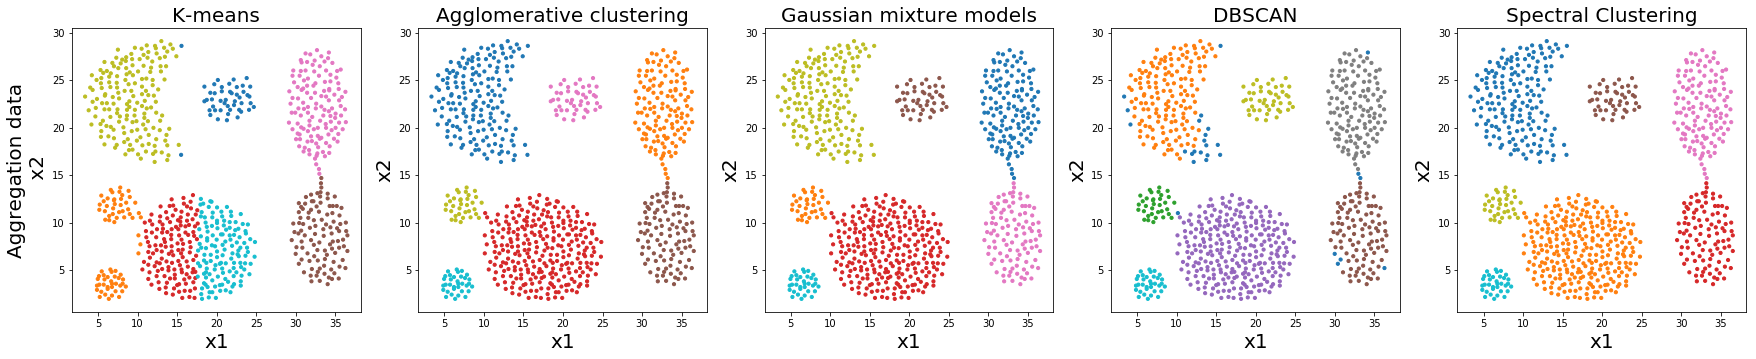

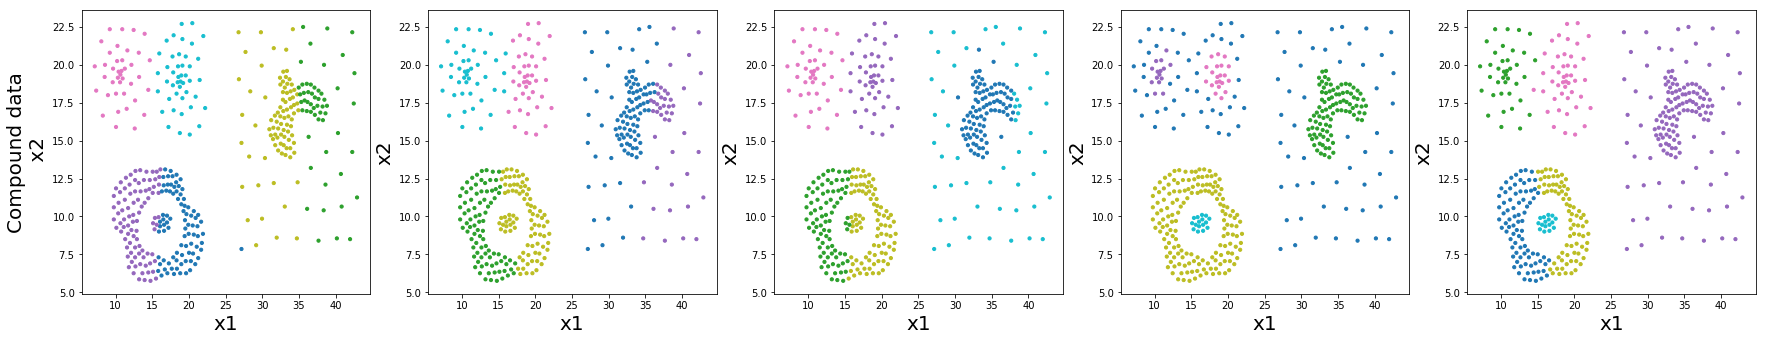

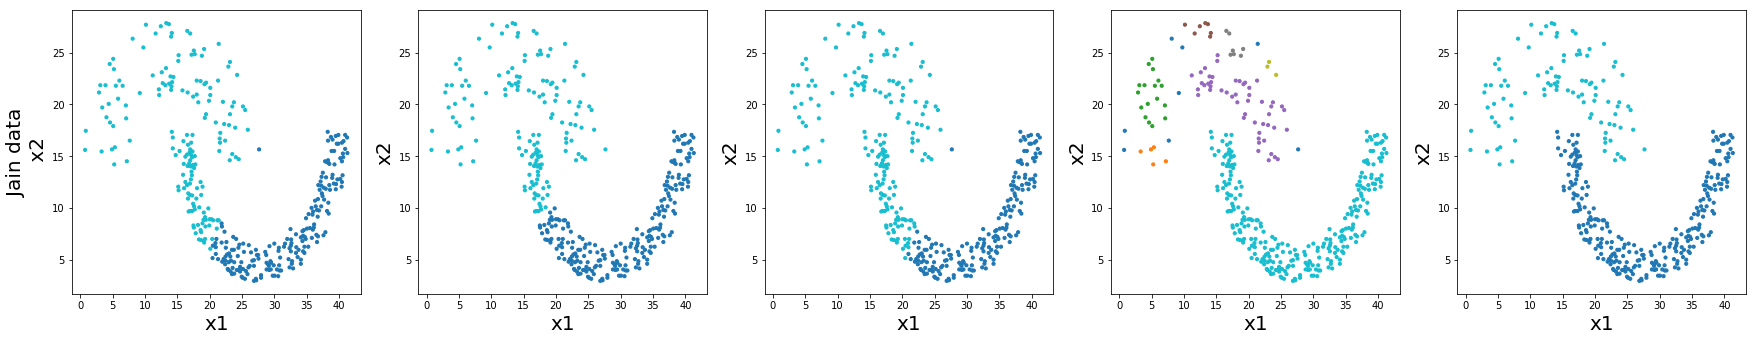

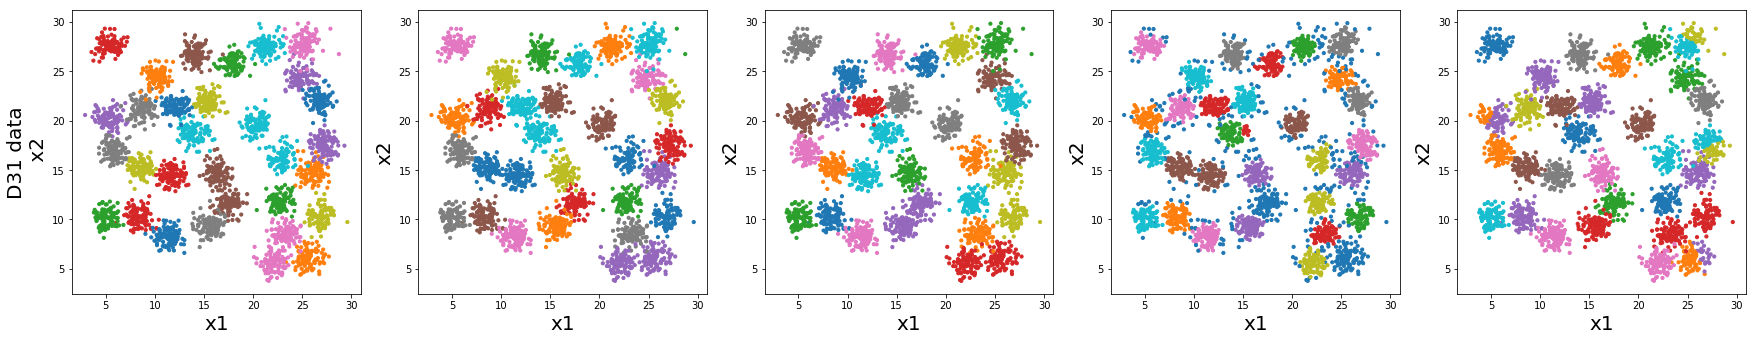

In [505]:
clusters = [7, 6, 2, 31]
agglo_linkage = ['average', 'ward', 'ward', 'average']
gmm_covtype =['full', 'spherical', 'spherical', 'tied']
dbscan_eps = [1.5, 1, 2, 0.5]
dbscan_minsamples = [10, 3, 3, 7]

i = 0
j = 1

for data in dataset:
    kmeans = KMeans(n_clusters = clusters[i]).fit(data)
    y_kmeans = kmeans.labels_
    agglo = AgglomerativeClustering(n_clusters = clusters[i], linkage = agglo_linkage[i]).fit(data)
    y_agglo = agglo.labels_
    gmm = GaussianMixture(n_components = clusters[i], covariance_type = gmm_covtype[i], n_init = 10).fit(data)
    y_gmm = gmm.predict(data)
    dbscan = DBSCAN(eps = dbscan_eps[i], min_samples = dbscan_minsamples[i]).fit(data)
    y_dbscan = dbscan.labels_
    spectral = SpectralClustering(n_clusters = clusters[i]).fit(data)
    y_spectral = spectral.labels_
    i += 1
    
    plt.figure(figsize = (30,24))
    y = [y_kmeans, y_agglo, y_gmm, y_dbscan, y_spectral]
    for label in y:
        plt.subplot(4, 5, j)
        plt.scatter(data[:,0],data[:,1], cmap='tab10', c = label, s = 10)
        if j % 5 == 1:
            plt.ylabel(name[j // 5] +'\n x2', fontsize = 20)
        else: 
            plt.ylabel('x2', fontsize = 20)
        plt.xlabel('x1', fontsize = 20)
        if j < 6:
            plt.title(titles[j - 1], fontsize = 20)
        else:
            pass
        j += 1

        


**Aggregation dataset:**<br/>
The plots above shows that the Agglomerative Clustering and Spectral Clustering performs very well to cluster Aggregation dataset, whereas Gaussian Mixture and K-means have the worst performance. The reason is that Agglomerative Clustering is suitable for the case where clusters are well-separted and Spectral Clustering is good at dealing with sparse affinity matrix. Gaussian Misture assumes all the data points are generated from a mixture of a finite number of gaussian distributions with unknown parameters, but it's not true for this dataset. K-means doesn't perform well because the data points have different deviation.

**Compound dataset:**<br/>
Compared with the original clusters by suggested labels, none of the five algorithms perform perfectly on Compound dataset. DBSCAN considers the density of data and doesn't make assumption about the cluster shapes, so it clusters very well for the right portion and bottom left portion of the data points on the graph. Other algorithms make wrong assumption about the cluster shapes, so they cannot sucessfully cluster the data. However, DBSCAN didn't do well for the top left part, because it separate the data according to the density, whereas other algorithms are able to cluster perfectly based on the data shapes.

**Jain dataset:**<br/>
Spectral clustering performes the best on the Jain dataset. The method takes into consideration the affinity matrix and clusters based on the relative positions of data points. For DBSCAN and Agglomerative Clustering, due to the different densities, they have difficulty in determining the exact boundaries. K-means and Gaussian Mixture makes wrong assumption about the clsuter shapes. 

**D31 dataset:**<br/>
K-means, Agglomerative Clustering, Gaussian Mixture, and Spectral Clustering perform nearly perfect on the D31 dataset because 31 clusters of data have very similar deviation and the same shape. However, DBSCAN doesn't perform well because it considers the different densities of the data points within the blobs and the difference distances between the any of the two blobs. 



## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

**(a) Load the scikit-learn digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.**

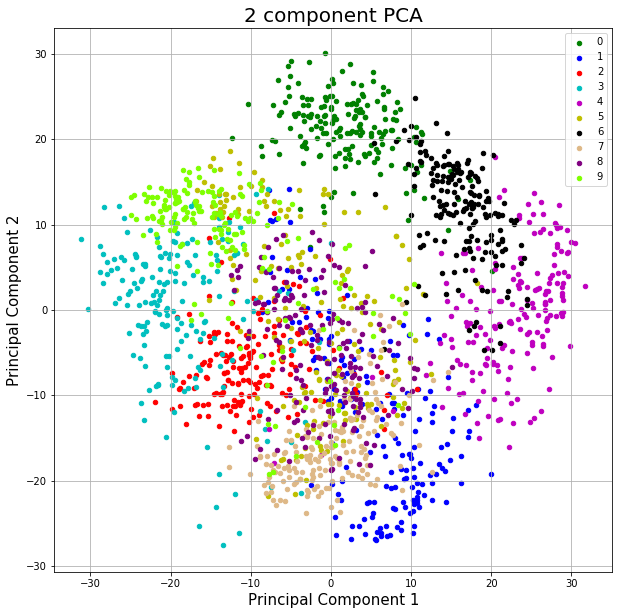

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca1 = pd.DataFrame(data = X_pca, columns = ['x', 'y'])
df_pca2 = pd.DataFrame(data = y, columns = ['labels'])
df_pca = pd.concat([df_pca1, df_pca2], axis= 1)
colors = {0:'g', 1:'b', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k', 7:'burlywood', 8:'purple', 9:'chartreuse'}
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
group1 = df_pca.groupby('labels')

for key, group in group1:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.grid()
plt.show()


**(b) t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively here. A video introducing this method can be found here for those who are interested.**



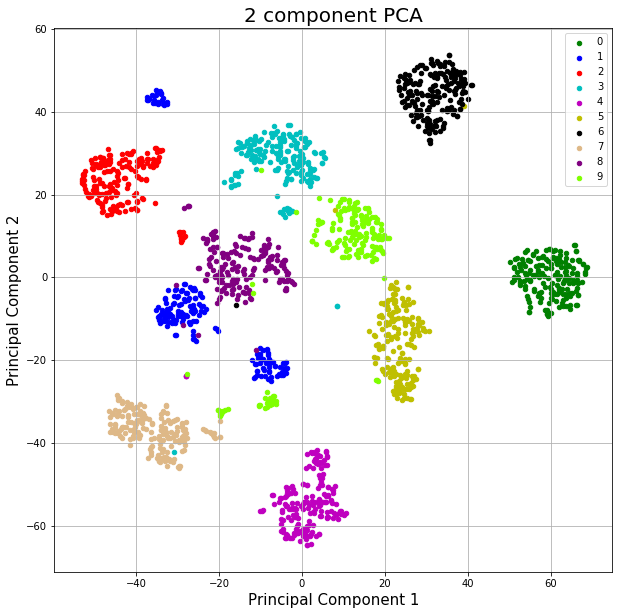

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state = 100)
X_tsne = tsne.fit_transform(X)

df_tsne1 = pd.DataFrame(data = X_tsne, columns = ['x', 'y'])
df_tsne2 = pd.DataFrame(data = y, columns = ['labels'])
df_tsne = pd.concat([df_tsne1, df_tsne2], axis = 1)
colors = {0:'g', 1:'b', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k', 7:'burlywood', 8:'purple', 9:'chartreuse'}
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
group2 = df_tsne.groupby('labels')

for key, group in group2:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.grid()
plt.show()

**(c) Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? Note: You typically will not have labels available.**

As we can see from the graphs above, t-SNE seems to cluster data better than PCA does. It has clear separation for data clusters, whereas PCA has many overlapped clusters. The reason is that PCA only does linear dimensional reduction, which cannot interpret complex polynomial relationship between features. However, t-SNE is a non-linear algorithm based on probability distribution.

PCA is more computationally efficient and can generate stable results from the different runs. Moreover, it can incorporate new data to the model.  However, it can only perform linear dimentional reduction.

t-NSE is capable to perform non-linear dimentional reduction, but it's computationally slow, which can be a problem for large datasets. Different runs using t-SNE can generate different results (unstable). Unlike PCA, it has to rerun when new data come in.


## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

**(a) Plot a number of examples of the original images.**

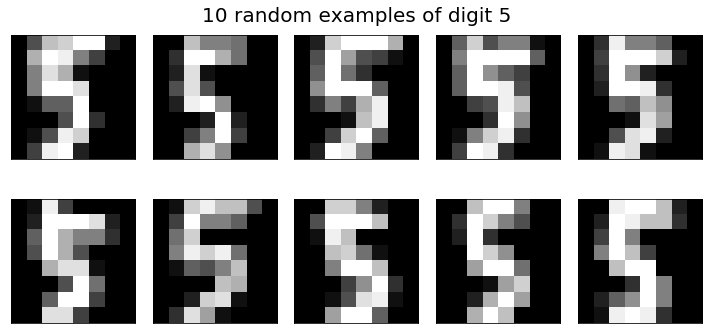

In [509]:
plt.figure(figsize=(10,5))
number_5 = X[y == 5, :]
index = np.random.choice(number_5.shape[0], size = 10, replace = False)

for i in range (1, 1+len(index)):
    plt.subplot(2, 5, i)
    plt.imshow(number_5[i].reshape(8,8), cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('10 random examples of digit 5', fontsize=20)
plt.tight_layout()
plt.show()

**(b) Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components.**

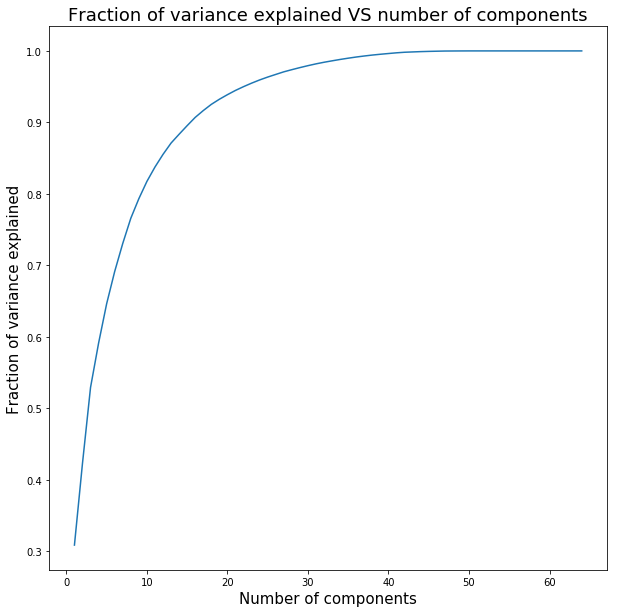

In [54]:
var = []
for i in range(1, 65):
    pca_5 = PCA(n_components = i)
    pca_5.fit_transform(number_5)
    var.append(np.sum(pca_5.explained_variance_ratio_))
    
plt.figure(figsize=(10,10))
plt.plot(range(1, 65), var)
plt.title('Fraction of variance explained VS number of components', fontsize = 18)
plt.xlabel('Number of components', fontsize = 15)
plt.ylabel('Fraction of variance explained', fontsize = 15)
plt.show()

**(c) Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.**



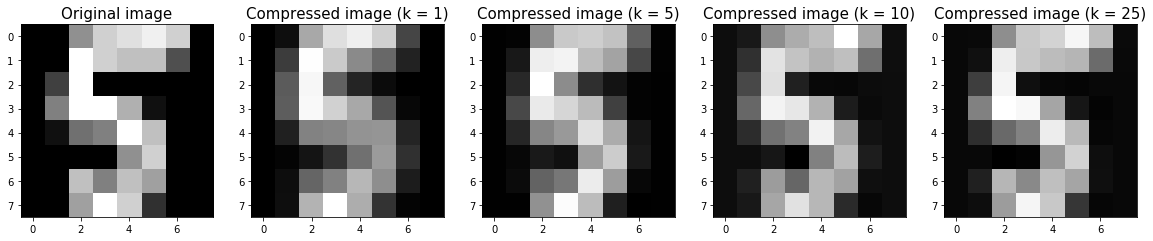

In [513]:

rand_img = np.random.randint(number_5.shape[0])
k_list = [0, 1, 5, 10, 25]

plt.figure(figsize=(20,10))
for i in range(len(k_list)):
    plt.subplot(1, 5, i+1)
    if i == 0:
        img = number_5[rand_img]
        plt.imshow(img.reshape(8,8), cmap = 'gray')
        plt.title('Original image', fontsize = 15)
    else:
        pca_5 = PCA(n_components = k_list[i])
        pca_5_ = pca_5.fit_transform(number_5)
        pca_5_inv = pca_5.inverse_transform(pca_5_)
        img = pca_5_inv[rand_img]   
        plt.imshow(img.reshape(8,8), cmap = 'gray')
        plt.title('Compressed image (k = %d)' % k_list[i], fontsize = 15)
    
plt.show()

**(d) How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.**

In this case, when k = 10, the compressed image is pretty similar to the compressed image when k = 25 as well as the original image. Therefore, 10 principal components are requried to well-approximate the original image.

Compression rate for $k = 1$: $\frac{N-k}{N} = \frac{64-1}{64} = 98.44\,\%$<br/>
When k = 1, the image is the blurrest one among all 4 compressed images becuase of the highest compression rate. However, we are still possible to identify the digit "5" in the image.

Compression rate for $k = 5$: $\frac{N-k}{N} = \frac{64-5}{64} = 92.19\,\%$<br/>
When k =5 , the image is a bit clearer than the one with k = 1. The compression rate reduces slightly. We are easier to tell it's "5".

Compression rate for $k = 10$: $\frac{N-k}{N} = \frac{64-10}{64} = 84.38\,\%$<br/>
When k = 10, with the 84.38% compression rate for 64 * 64 original image, this compressed image is good enough to approximate the oringal one. It's very esay to see "5" in the image.

Compression rate for $k = 25$: $\frac{N-k}{N} = \frac{64-25}{64} = 60.94\,\%$<br/>
When k = 25, the image looks almost the same as the original image. It has the highest principal components and consequently the lowest compression rate. 

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

**(a) Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.**



In [17]:
import numpy as np

class NeuralNetwork:
    def __init__(self, inputLayer = 2, hiddenLayer1= 5, hiddendLayer2 = 5, outputLayer = 1, max_iter = 5000, lr = 0.01):
        np.random.seed(100)
        self.inputLayer = inputLayer
        self.hiddenLayer1 = hiddenLayer1
        self.hiddenLayer2 = hiddendLayer2
        self.outputLayer = outputLayer
        self.max_iter = max_iter
        self.lr = lr
        #Initialize random weights
        self.W1 = np.random.randn(self.inputLayer+1, self.hiddenLayer1)
        self.W2 = np.random.randn(self.hiddenLayer1, self.hiddenLayer2)
        self.W3 = np.random.randn(self.hiddenLayer2, self.outputLayer)
    
    def sigmoid(self, z):
        #Activation function
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1 + np.exp(-z))**2)

    def predict_proba(self, X):
        #Moving inputs forward through the network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.W3)
        #Get estimation from Propogation
        yHat = self.sigmoid(self.z4)
        return yHat
    
    def cost(self, X, y):
        #Calcluate the cost
        self.yHat = self.predict_proba(X)
        cost = 0.5 * sum((y - self.yHat)**2)
        return cost
    
    def fit(self, X, y):
        #Backpropagation by calculating the derivatives on weights and train the neural network
        for i in range(self.max_iter): 
            self.yHat = self.predict_proba(X)
            delta4 = np.multiply((y-self.yHat), self.sigmoidPrime(self.z4))
            dJdW3 = np.dot(self.a3.T, delta4)
            self.W3 += self.lr * dJdW3
            delta3 = np.dot(delta4, self.W3.T)*self.sigmoidPrime(self.z3)
            dJdW2 = np.dot(self.a2.T, delta3)
            self.W2 += self.lr * dJdW2
            delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
            dJdW1 = np.dot(X.T, delta2) 
            self.W1 += self.lr * dJdW1
            
    def predict(self,X):
        #Predict function
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.a3,self.W3)
        self.yHat = self.sigmoid(self.z4)
        y_predict = self.yHat
        y_predict[y_predict >= 0.5] = 1
        y_predict[y_predict < 0.5] = 0
        return y_predict
    
        

**(b) Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.**



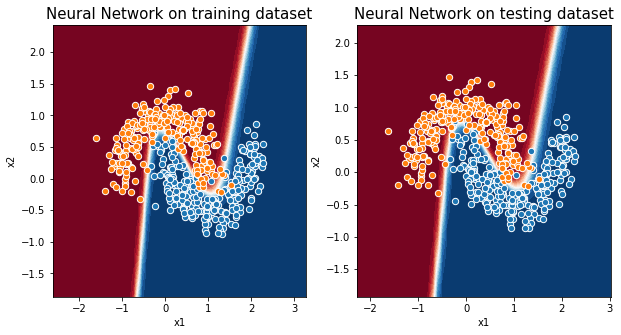

In [18]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples = 500, noise = 0.2, random_state = 100)
X_test, y_test = make_moons(n_samples = 100, noise = 0.2, random_state = 100)
bias_train = np.ones((X_train.shape[0], 1))
bias_test = np.ones((X_test.shape[0], 1))
X_train = np.hstack((X_train, bias_train))
y_train = y_train.reshape(-1, 1)
X_test = np.hstack((X_test, bias_test))
y_test = y_test.reshape(-1, 1)

#Fit the Neural Network model
NN = NeuralNetwork()
NN.fit(X_train,y_train)

#Apply the model on training data and make a plot
X_min_train, X_max_train = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_train, y_max_train = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(X_min_train, X_max_train, 0.1), np.arange(y_min_train, y_max_train, 0.1))
pred = NN.predict_proba(np.c_[XX.reshape(-1, 1), yy.reshape(-1, 1), np.ones((XX.reshape(-1, 1).shape[0], 1))])
yHat = pred.reshape(yy.shape)

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
contour = plt.contourf(XX, yy, yHat, 25, cmap="RdBu", vmin=0, vmax=1)
plt.scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], s=40, cmap="RdBu", label="class_1", edgecolor="white", linewidth=1)
plt.scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], s=40, cmap="RdBu", label="class_0", edgecolor="white", linewidth=1)
plt.xlabel("x1", fontsize = 10)
plt.ylabel("x2", fontsize = 10)
plt.title("Neural Network on training dataset", fontsize = 15)


#Apply the model on testing data and make a plot
X_min_test, X_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(X_min_test, X_max_test, 0.1), np.arange(y_min_test, y_max_test, 0.1))
pred = NN.predict_proba(np.c_[XX.reshape(-1, 1), yy.reshape(-1, 1), np.ones((XX.reshape(-1, 1).shape[0], 1))])
yHat = pred.reshape(yy.shape)

plt.subplot(1, 2, 2)
contour = plt.contourf(XX, yy, yHat, 25, cmap="RdBu", vmin=0, vmax=1)
plt.scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], s=40, cmap="RdBu", label="class_1", edgecolor="white", linewidth=1)
plt.scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], s=40, cmap="RdBu", label="class_0", edgecolor="white", linewidth=1)
plt.xlabel("x1", fontsize = 10)
plt.ylabel("x2", fontsize = 10)
plt.title("Neural Network on testing dataset", fontsize = 15)
plt.show()

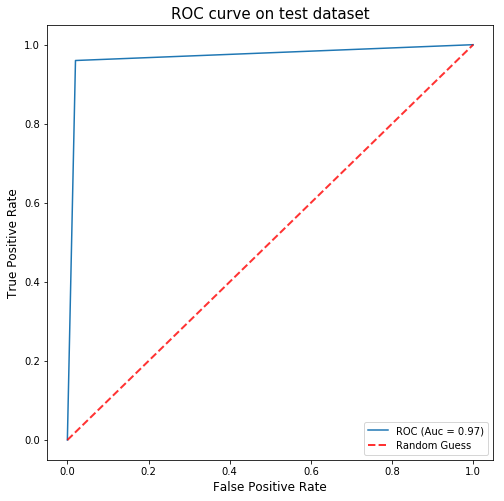

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred = NN.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fig = plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label="ROC (Auc = %0.2f)" % (auc))
plt.plot([0, 1], [0, 1], linestyle="--", lw = 2, color="r", label="Random Guess", alpha = 0.8)
plt.title('ROC curve on test dataset', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend()
plt.show()

**(c) Suggest at least two ways in which you neural network implementation could be improved.**

We can improve the neural network model by 
1. Increasing the hidden layers 
2. Increasing the nodes in the hidden layers
3. Applying better activation function
